In [23]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# Sample variance

In [24]:
a = sp.random.normal(size=1000)
stats.tvar(a) # Sample variance

0.9861959672115655

In [3]:
a.var()

0.9753338824555462

In [4]:
a.var() * a.size / (a.size - 1)

0.9763101926481944

# Shapiro-Wilk

In [25]:
norm1 = sp.random.normal(size=1000)

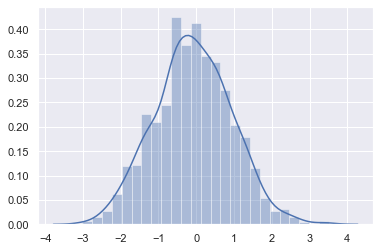

In [26]:
sns.distplot(norm1)

In [27]:
norm1[:10]

array([-0.72092026, -1.02468424, -0.78183002, -0.71733829,  0.63761911,
        1.16213864,  0.80662572,  1.50822311,  0.42484497, -0.32394338])

In [28]:
exp1 = sp.random.exponential(size=1000)

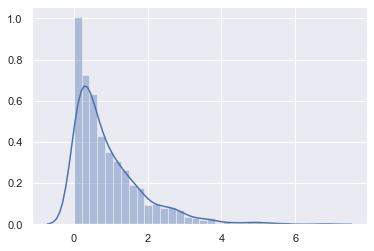

In [29]:
sns.distplot(exp1)

In [30]:
print(stats.shapiro(norm1))
print(stats.shapiro(exp1))

(0.9985280632972717, 0.5730432271957397)
(0.8250195980072021, 1.1688982993715184e-31)


# Student

In [43]:
y = np.random.normal(1, 1, size=90)
x = np.random.normal(1.3, 1, size=90)
print(stats.ttest_ind(y, x)) # H3 y_mean <> x_mean
y.mean(), x.mean()

Ttest_indResult(statistic=-1.8103977038268246, pvalue=0.07192057115630549)


(0.9997927795709276, 1.2675104105713213)

In [44]:
# H1: y < x
# 1. T-statistic < 0
s, p = stats.ttest_ind(y, x)
s, p

(-1.8103977038268246, 0.07192057115630549)

In [45]:
one_sided_p_value = p / 2
one_sided_p_value

0.03596028557815274

(1.1934745109851599, 0.5921523359171074)

# Wilcoxon
# Mann–Whitney U test

In [46]:
x = np.array([
    10043, 9596, 10305, 8354, 9413, 19776, 9815, 11311, 11253, 10856, 11389
])

y = np.array([
    14253, 7843, 9581, 8594, 16119, 10112, 10173, 9756
])

In [50]:
y.mean(), x.mean()

(10803.875, 11101.0)

In [47]:
ranks = stats.rankdata(np.hstack([x, y]))
ranks

array([ 9.,  6., 12.,  2.,  4., 19.,  8., 15., 14., 13., 16., 17.,  1.,
        5.,  3., 18., 10., 11.,  7.])

In [76]:
y_ranks = ranks[x.size:]
y_ranks

array([17.,  1.,  5.,  3., 18., 10., 11.,  7.])

In [77]:
np.sum(y_ranks)

72.0

In [81]:
y.size

8

In [82]:
y.size * (y.size + 1) / 2

36.0

In [83]:
x.size * (x.size + 1) / 2

66.0

In [52]:
stats.mannwhitneyu(y, x, alternative='two-sided')

MannwhitneyuResult(statistic=36.0, pvalue=0.5357239360626169)

In [96]:
y_ranks

array([17.,  1.,  5.,  3., 18., 10., 11.,  7.])

In [97]:
x_ranks = ranks[:x.size]
x_ranks

array([ 9.,  6., 12.,  2.,  4., 19.,  8., 15., 14., 13., 16.])

In [98]:
u1 = x_ranks.sum() - x.size * (x.size + 1) / 2
u1

52.0

In [100]:
u2 = y_ranks.sum() - y.size * (y.size + 1) / 2
u2

36.0

# Fisher

**Greater / Lesser**

In [61]:
y = np.random.normal(0, 1, size=100)
x = np.random.normal(0.5, 1.5, size=100)

print(y.mean(), x.mean())
print(y.var(), x.var())

0.04790147137900336 0.38130029043608327
0.9835629958813462 1.6163143583052557


In [54]:
F = stats.tvar(x) / stats.tvar(y)
F

2.6095799384566245

In [55]:
p_value = 1 - stats.f.cdf(F, len(x) - 1, len(y) - 1)
p_value

0.0005199820146428724

# Ansari-Bradley test

In [62]:
stats.ansari(x, y)

AnsariResult(statistic=4623.0, pvalue=0.03691233389462469)

In [63]:
N = x.size + y.size
print(N)
A = 0
for r in stats.rankdata(np.hstack([x, y]))[:x.size]:
    A += (N + 1) / 2 - np.abs(r - (N + 1) / 2)
A

200


4623.0

In [64]:
M = x.size * (N + 2) / 4
D = x.size * y.size * (N + 2) * (N - 2) / (48 * (N - 1))

A_std = (A - M) / np.sqrt(D)
A_std

-2.086732365493122

In [65]:
p_value = 2 * stats.norm.cdf(A_std)
p_value

0.03691233389462469